<a href="https://colab.research.google.com/github/eduardonsm/ImersaoDados/blob/main/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas que vamos utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#amostra dos dados do ENEM 2019
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

x = notas_entrada
y = notas_saida 

#biblioteca para machine learning
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [ ]:
x_treino.head()

NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
90200        567.7       523.2       542.7            660.0
12375        497.1       423.0       445.2            580.0
46320        494.0       528.5       454.0            520.0
111208       561.9       572.7       385.8            640.0
75943        686.5       646.5       625.7            900.0

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)#organizando os dados para o modelo

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [ ]:
predicoes_matematica = modelo.predict(x_teste) #previsoes da nota

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

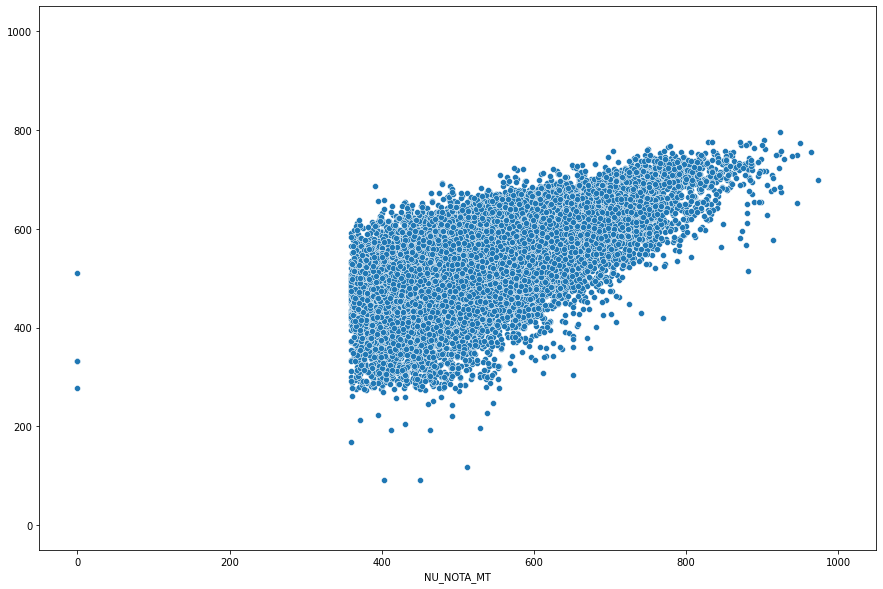

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

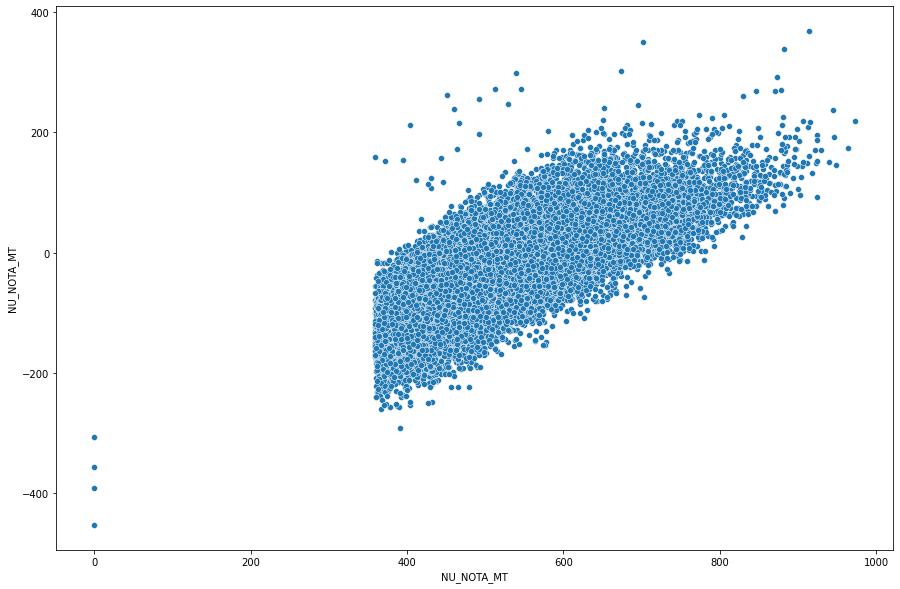

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados["quadrado_diferenca"].mean()**(1/2) #modo de medir a eficacia do modelo

81.26755383435341

In [ ]:
from sklearn.dummy import DummyRegressor #outra foma de regressão
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste,dummy_predicoes,squared=False) #realiza a medição de forma automatica

109.83462836696586

**Desafio 01 - Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula**

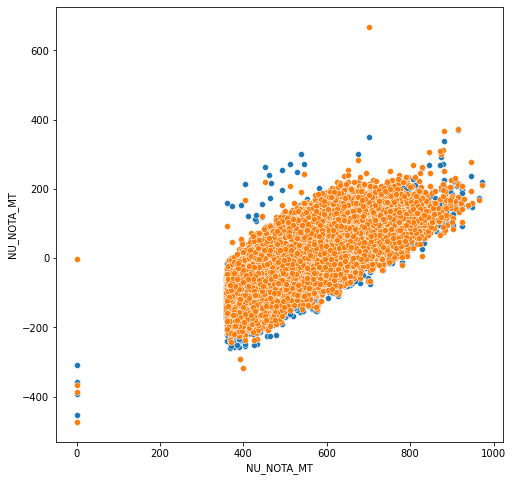

In [ ]:
#usando rede neural
from sklearn.neural_network import MLPRegressor

modelo_regress = MLPRegressor(hidden_layer_sizes=(20,5),random_state=SEED).fit(x_treino, y_treino)
predicoes_matematica2 = modelo_regress.predict(x_teste)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)#linearSVR, azul
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica2)#rede neural,laranja

In [ ]:
mean_squared_error(y_teste,predicoes_matematica2,squared=False)

76.2342910960089

**Com os valores da media das diferenças podemos notar que a rede neural foi a melhor**

Lembrando a diferença deve ser o mais perto do 0

*   Diferença LinearSVR = **81.26755383435341**
*   Diferença Rede Neural = **76.2342910960089**

**Desafio 2 - Ler a documentação do Dummy e alterar o método de regressão**

In [ ]:
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste,dummy_predicoes,squared=False)

112.24958784688691

**Desafio03: Buscar outra métrica para avaliar modelos de regressão**

In [ ]:
#Mean squared logarithmic error
from sklearn.metrics import mean_squared_log_error

svr = mean_squared_log_error(y_teste,predicoes_matematica)
rn = mean_squared_log_error(y_teste,predicoes_matematica2)

print(f"A nota do LinearSVR foi {svr:.4f} \nA nota da Rede Neural foi {rn:.4f} ")

A nota do LinearSVR foi 0.031 
A nota da Rede Neural foi 0.027 


In [ ]:
#R² score, the coefficient of determination
from sklearn.metrics import r2_score

svr = r2_score(y_teste,predicoes_matematica)
rn = r2_score(y_teste,predicoes_matematica2)
print(f"A nota do LinearSVR foi {svr:.4f} \nA nota da Rede Neural foi {rn:.4f} ")

A nota do LinearSVR foi 0.4524 
A nota da Rede Neural foi 0.5182 
